$$ \huge Моделирование \ полета \ ракеты $$

$ \textbf{Постановка задачи:} $ В начальный момент времени ракета стартует с нулевой начальной скоростью с поверхности Земли под углом $\alpha_0$ к горизонту. Относительная скорость истечения газов $u$, расход топлива $\mu$, начальная масса ракеты $M$, масса заправленного топлива $-$ $m_0$. За время $dt$ ракета поворачивается на угол $d \alpha $. Определить траекторию движения ракеты. 

 Пусть $m$ $-$ мгновенная масса ракеты, тогда $\\$
$-$ при $m > M - m_0$: ракета летит под действием реактивной тяги $\\$
$-$ при $m \leq M - m_0$: ракета начинает двигаться только под действием силы тяжести со скоростью 

Из непростейших физических соображений можно получить минимум необходимых формул: $\\$
1) Проекция мнговенной скорости на Ox
$$ \upsilon_x = \frac{u \mu \cos{\alpha}}{m} \cdot t $$
2) Проекция мнговенной скорости на Oy
$$ \upsilon_y = \left( \frac{u \mu \sin{\alpha}}{m} - g \right) \cdot t $$

Начнем с простого $-$ обозначим класс ракеты

In [66]:
import math

MODEL_G = 9.81 # ускорение свободного падения
MODEL_DT = 0.01
MODEL_D_ALPHA = 0.002

class Rocket:
    def __init__(self, x, y, u, alpha_0, M, m_0, mu):
        """
        Параметры:
        ----------
        x: float
            горизонтальная координата
        y: float
            вертикальная координата
        u: float
            скорость относительного истечения газов из сопла
        alpha_0: float
            начальный угол ракеты
        M: float
            масса всей ракеты
        m_0: float
            масса топлива
        mu: float
            расход топлива 
        """

        self.x = x
        self.y = y
        self.u = u
        self.alpha_0 = alpha_0
        self.M = M
        self.m_0 = m_0
        self.mu = mu
        
        self.vx = 0
        self.vy = 0
        self.trajectory_x = []
        self.trajectory_y = []
        self.m = M
        self.alpha = alpha_0
    
    def fuel_burn(self):
        """
        Поиск мгновенной массы (сжигание топлива)
        """
        self.m -= self.mu * MODEL_DT
    
    def rotate(self):
        """
        Поворот ракеты
        """
        self.alpha -= MODEL_D_ALPHA

    def advance(self):
        """
        Продвижение ракеты        
        """
        self.trajectory_x.append(self.x)
        self.trajectory_y.append(self.y)
        if self.m > self.M - self.m_0 and self.alpha > 0:
            self.fuel_burn()
            self.rotate()
            self.vx += self.u * self.mu * math.cos(self.alpha) / self.m * MODEL_DT 
            self.vy += (self.u * self.mu * math.sin(self.alpha) / self.m - MODEL_G) * MODEL_DT
        else:
            self.vy -= MODEL_G * MODEL_DT

        self.x += self.vx * MODEL_DT
        self.y += self.vy * MODEL_DT


После объявления класса и запрограммированной траектории её необходимо изобразить!

In [71]:
import numpy as np

X = 0
Y = 0
U = 5000
ALPHA_0 = math.pi/6
M = 15000
M_0 = 10000
MU = 350

r = Rocket(X, Y, U, ALPHA_0, M, M_0, MU)

for t in np.arange(0, 20, MODEL_DT):
    if r.y >= 0:
            r.advance()

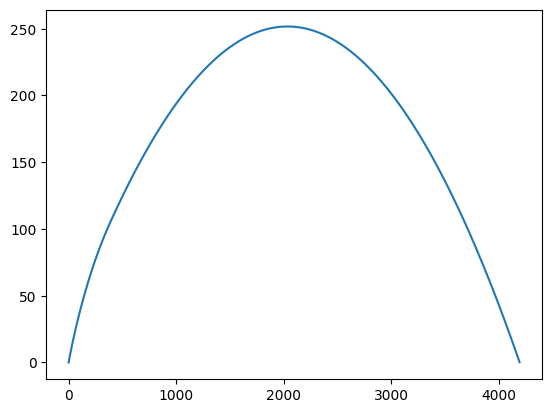

In [72]:
%matplotlib inline
from matplotlib import pyplot as pp

pp.plot(r.trajectory_x, r.trajectory_y) 